# Detecting Letters in Sign Language (Classification)

by Levana Cohen & Rachel Mintz

## 1. Data Preparation
### 1.1 Packages import

In [1]:
%matplotlib inline
import cv2
from sklearn.datasets import fetch_openml
import pandas as pd
import seaborn as sns
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter

### 1.2 Data Loading<br>
The data for this project can be obtained from [this page](https://www.kaggle.com/datasets/datamunge/sign-language-mnist?resource=download) in kaggle.

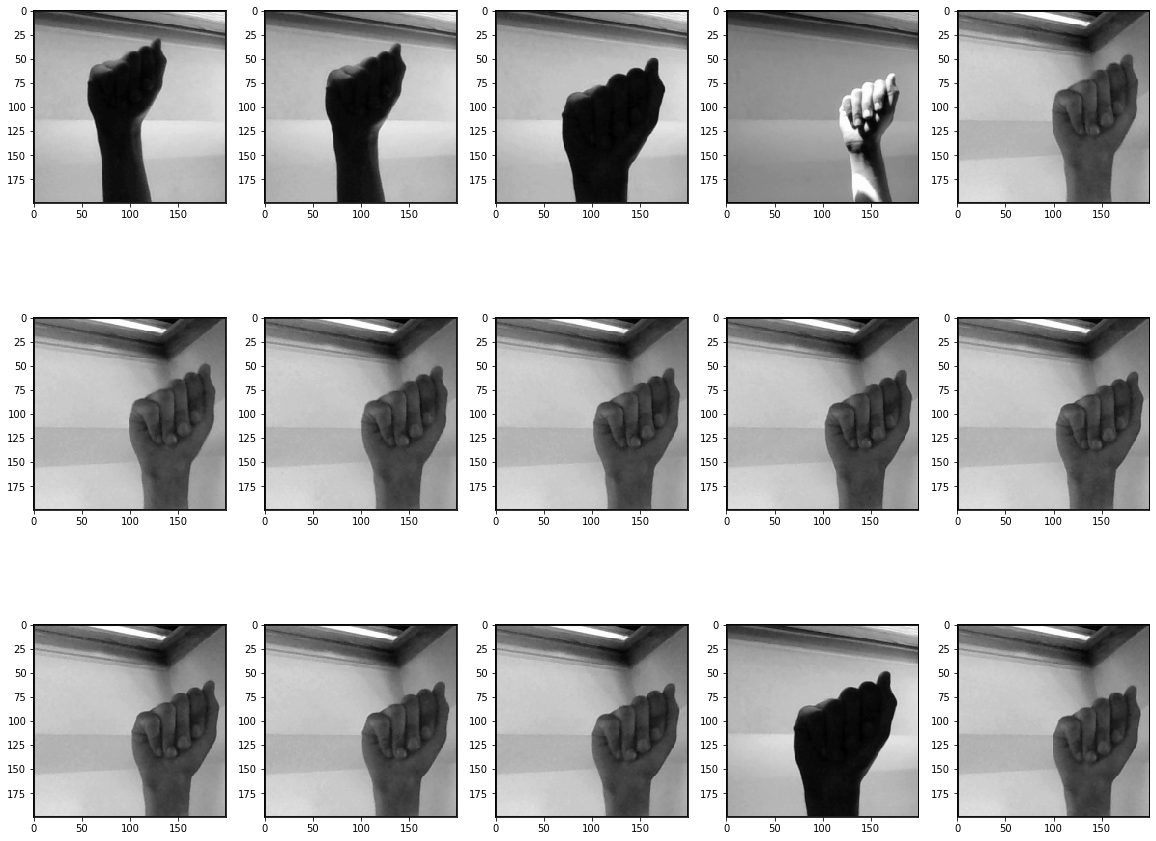

In [2]:
import os

directory = r"ASL Alphabet\asl_alphabet_train\asl_alphabet_train\A"
plt.figure(figsize=(20,16))
train_img = 
for index, filename in enumerate(os.listdir(directory)):
    if (filename.endswith(".jpg") or filename.endswith(".png")) and index < 15:
        # Read the image
        img = cv2.imread(os.path.join(directory, filename))
        if img is not None:
            plt.subplot(3, 5, index + 1)
            # Convert to grayscale
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            plt.imshow(gray_img, cmap=plt.cm.gray)
            train_img
            
        
    
#     if f.endswith(".jpg") and index < 15:
#         plt.subplot(3, 5, index + 1)
#         image = Image.open(f"{image_path_A}\{f}")
#         gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
#         plt.imshow(gray_image, cmap=plt.cm.gray)

In [6]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')

## Preprocess the Images

In [8]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        if os.path.isdir(label_path):
            for filename in os.listdir(label_path):
                img_path = os.path.join(label_path, filename)
                img = Image.open(img_path).convert('L')  # Convert to grayscale
                img = img.resize((64, 64))  # Resize image
                img_array = np.array(img).flatten()  # Flatten image
                images.append(img_array)
                labels.append(label)
    return np.array(images), np.array(labels)

images, labels = load_images_from_folder(r'ASL Alphabet\asl_alphabet_train\asl_alphabet_train')


## Encode Labels

In [9]:
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

## Split Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

## Train the Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')